# Studies of time series data

## Reading and plotting stock PETR4 and BVSP

In [1]:
import numpy as np
import pandas as pd
import Operations as Op
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP', 'PETR4.SA']
df = Op.get_data(symbols, dates)

In [3]:
df.tail()

,^BVSP,PETR4.SA
2018-09-24,77984.0,20.000000
2018-09-25,78630.0,20.080000
2018-09-26,78656.0,20.190001
2018-09-27,80000.0,21.459999
2018-09-28,79342.0,21.090000


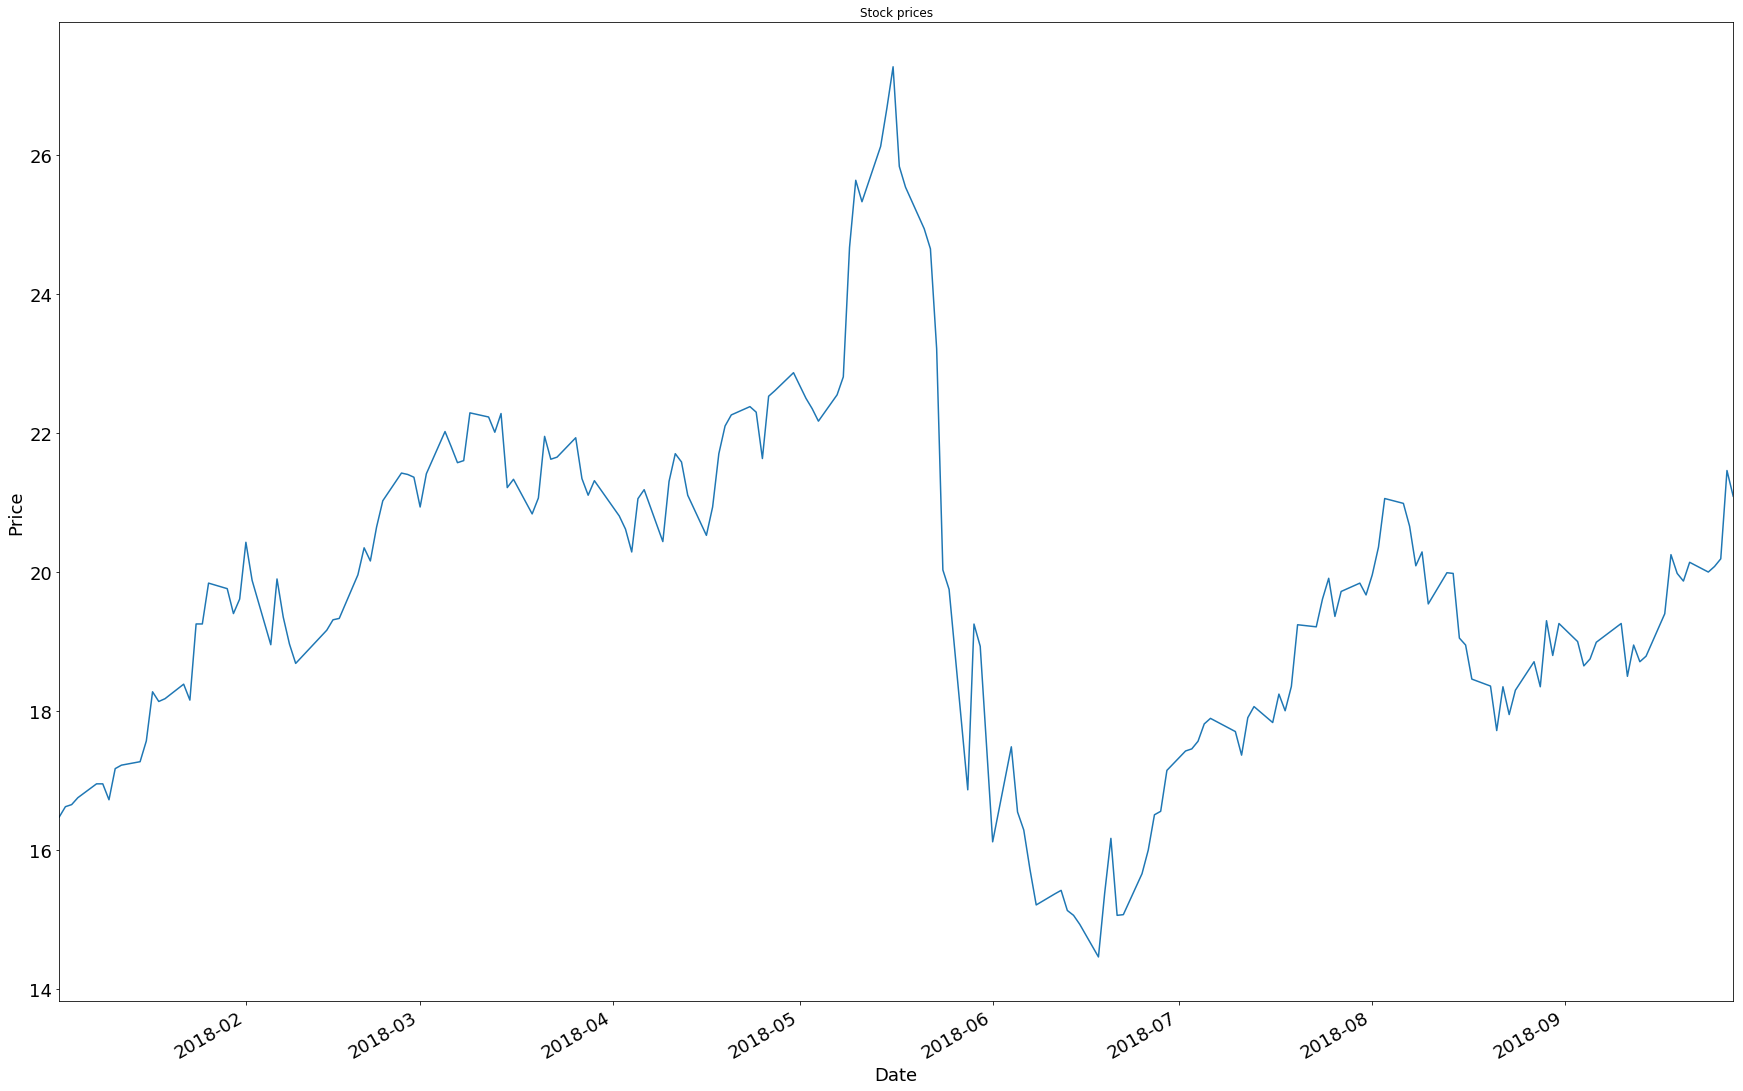

In [4]:
Op.plot_data(df['PETR4.SA']);

### Calculate Bollinger Bands

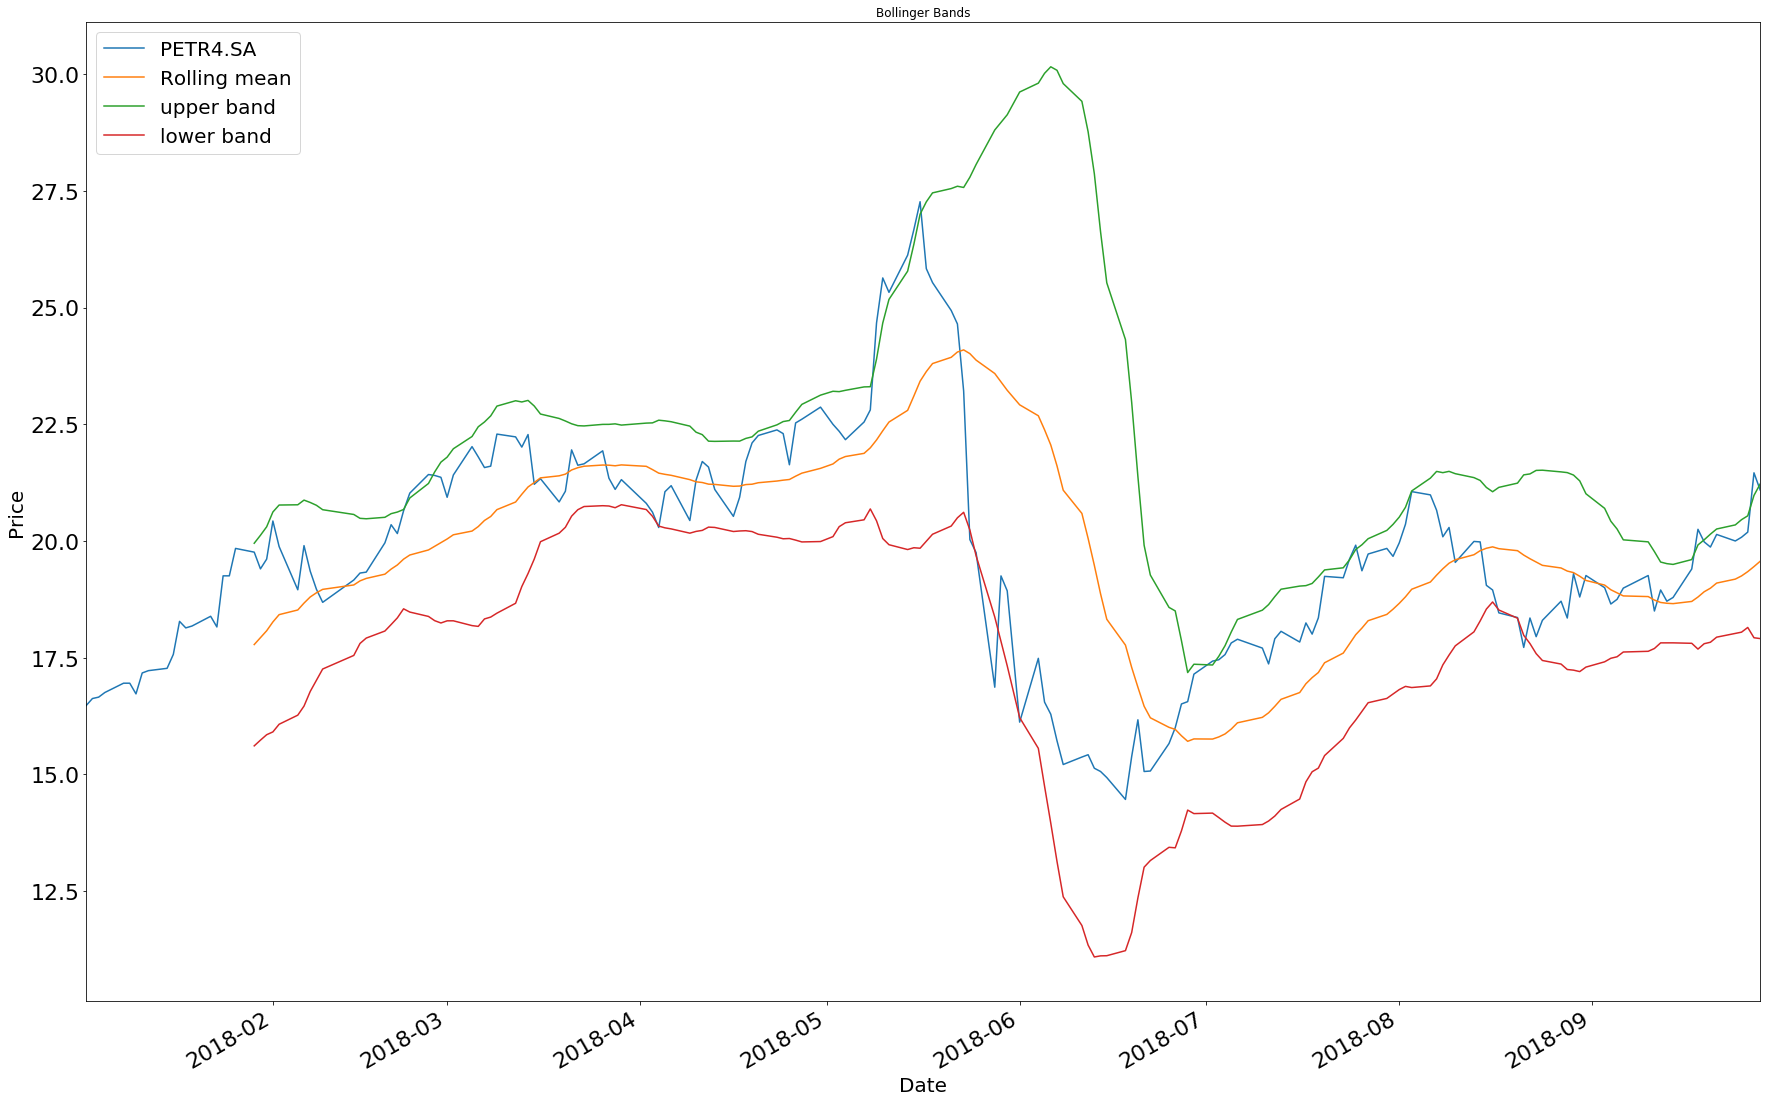

In [5]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['^BVSP', 'PETR4.SA']
df = Op.get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = Op.get_rolling_mean(df['PETR4.SA'], window=20)

# 2. Compute rolling standard deviation
rstd_SPY = Op.get_rolling_std(df['PETR4.SA'], window=20)

# 3. Compute upper and lower bands
upper_band, lower_band = Op.get_bollinger_bands(rm_SPY, rstd_SPY)

# Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['PETR4.SA'].plot(title="Bollinger Bands", label='PETR4.SA', figsize=(30,20), fontsize=(22))
rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date", fontsize=(20))
ax.set_ylabel("Price", fontsize=(20))
ax.legend(loc='upper left', fontsize=(20))
plt.show();

### Compute daily returns

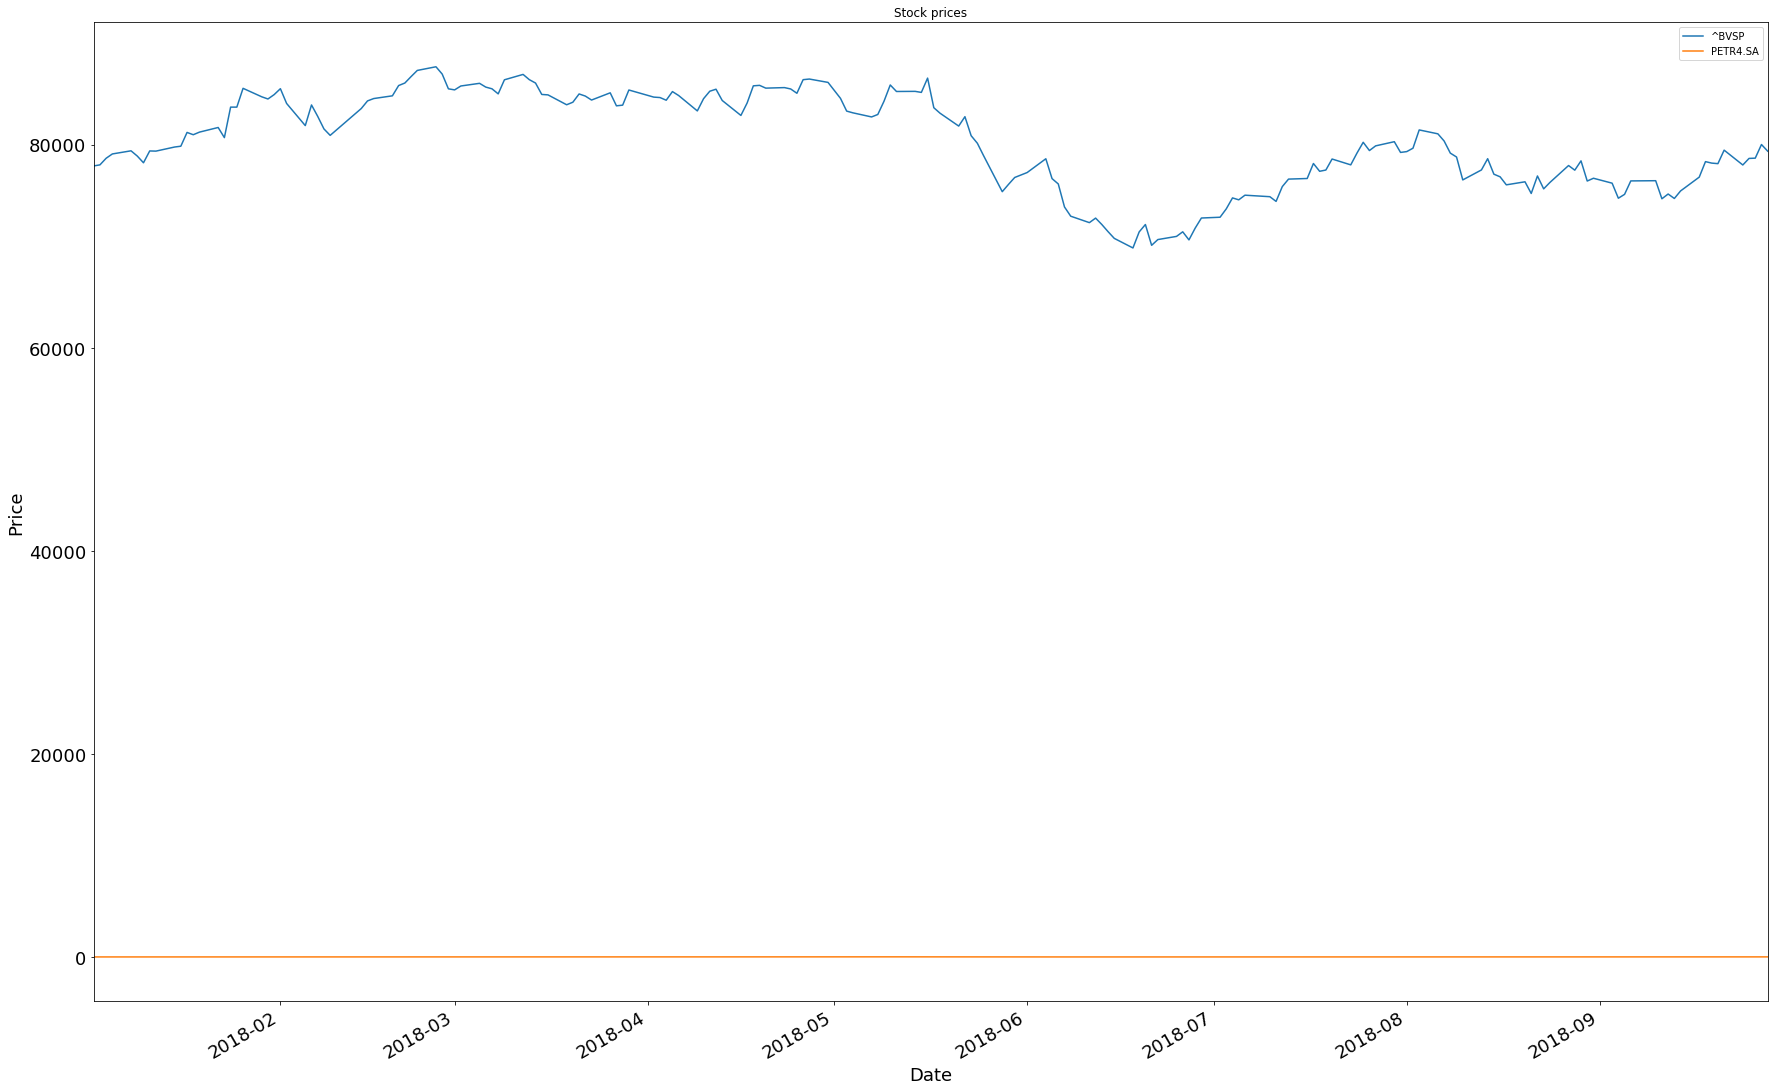

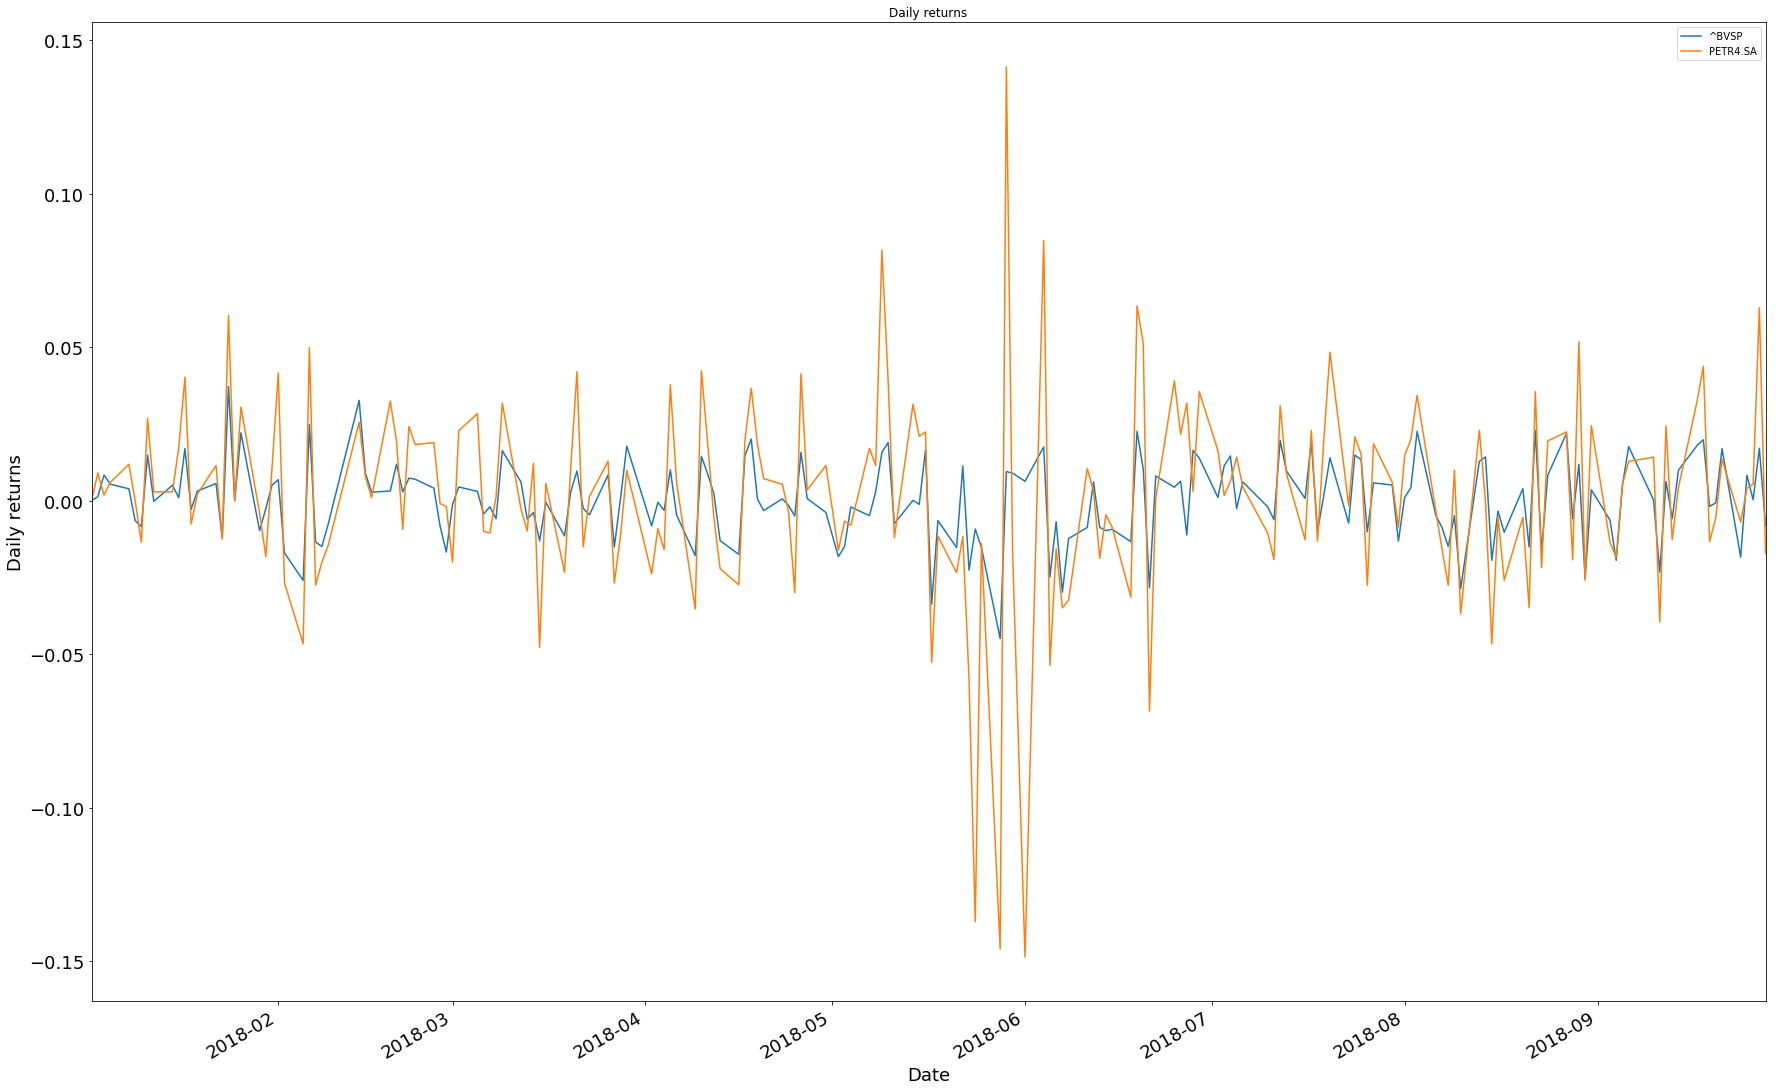

In [6]:
# Read data
dates = pd.date_range('2018-01-01', '2018-09-30')
symbols = ['PETR4.SA']
df = Op.get_data(symbols, dates)
Op.plot_data(df)

# Compute daily returns
daily_returns = Op.compute_daily_returns(df)
Op.plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")


### Cumulative returns